# Exploratory_data_analysis

### 1.Importation ``des`` `données` ``adéquates``

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

## 2. Importation des listes

In [64]:
df = pd.read_csv('train2.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font color='grey'> A partir de ces informations, nous pouvons déjà voir que certaines caractéristiques ne seront pas applicables dans notre analyse exploratoire car il y a trop de valeurs manquantes (comme `Alley` et `PoolQC`). De plus, il y a tellement de fonctionnalités à analyser, qu'il vaut peut-être mieux s'intégrer sur celles qui peuvent nous donner de véritables informations. Supprimons simplement `Id` et les caractéristiques avec 30 % ou moins de valeurs `NaN`.</font>

Voyons maintenant comment le prix du logement est réparti

In [66]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

del df2['Id']

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

df = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



<font color='grey'> Remarque : Si nous prenons les fonctionnalités que nous venons de supprimer et regardons leur description dans le fichier `data_description.txt`, nous pouvons en déduire que ces fonctionnalités peuvent ne pas être présentes sur toutes les maisons (ce qui explique le `NaN ` valeurs). Dans notre prochain cahier de préparation/nettoyage des données, nous pourrions les transformer en valeurs factices catégorielles.</font>

Voyons maintenant comment se répartissent les prix des logements.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_2080/3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


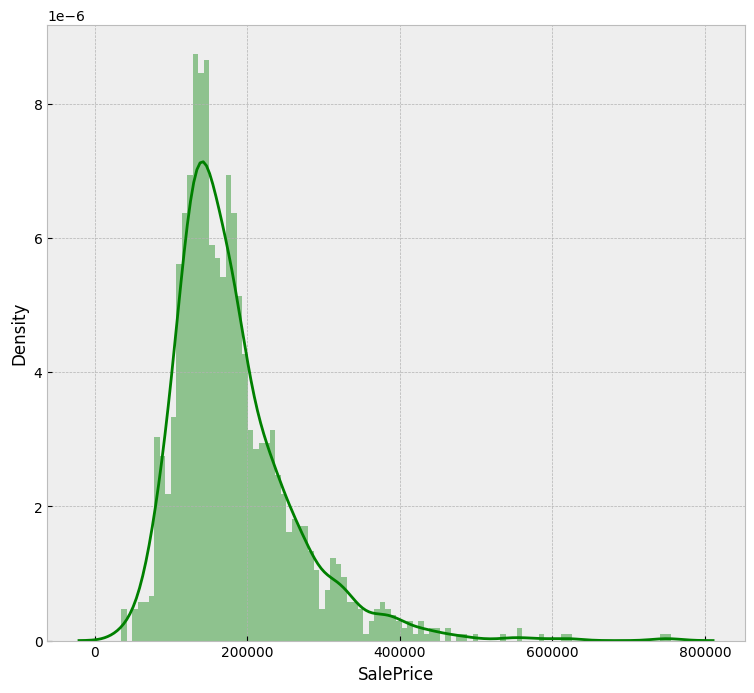

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

<font color='grey'>Avec ces informations, nous pouvons voir que les prix sont biaisés à droite et que certaines valeurs aberrantes se situent au-dessus de ~500 000. Nous voudrons éventuellement nous en débarrasser pour obtenir une distribution normale de la variable indépendante (`SalePrice`) pour l'apprentissage automatique.</font>

<font color='grey'>Remarque : Apparemment, l'utilisation de la fonction de journalisation pourrait également faire l'affaire, mais je n'en ai aucune expérience.</font>

# Numerical data distribution

<font color='grey'>Pour cette partie, regardons la distribution de toutes les caractéristiques en les traçant </font>

<font color='grey'>Pour ce faire, listons d'abord tous les types de nos données de notre jeu de données et ne prenons que les numériques : </font>

In [46]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [47]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<font color='grey'>Maintenant, traçons-les tous :</font>

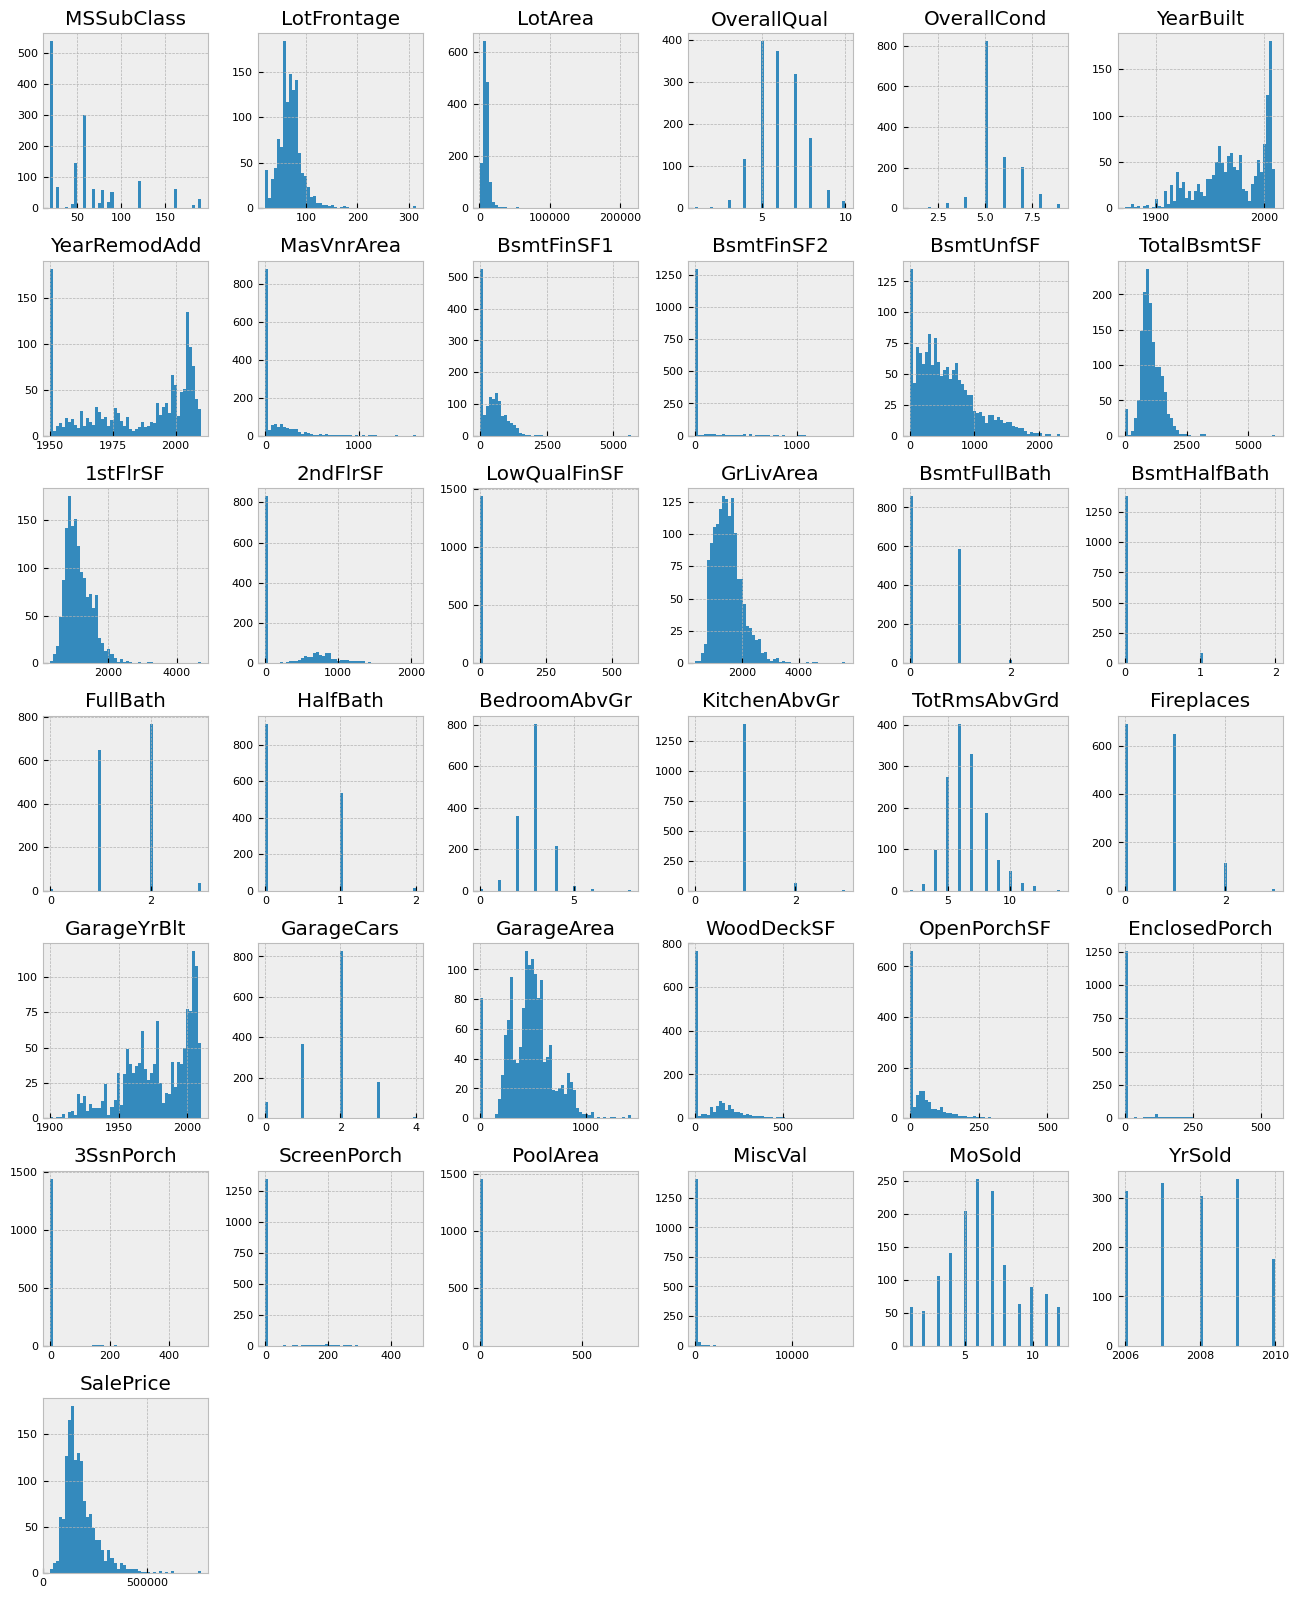

In [48]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<font color='grey'>Des fonctionnalités telles que `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... semblent partager une distribution similaire à celle que nous avons avec `SalePrice`. Voyons si nous pouvons trouver de nouveaux indices plus tard.</font>

### Correlation

<font color='grey'>Nous allons maintenant essayer de trouver quelles caractéristiques sont fortement corrélées avec `SalePrice`. Nous les stockerons dans une variable appelée `golden_features_list`. Nous allons réutiliser notre ensemble de données `df_num` pour ce faire.</font>

In [49]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 car la dernière ligne est SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


la corrélation est affectée par les valeurs aberrantes. Nous pourrions donc procéder comme suit :

- Tracez les caractéristiques numériques et voyez lesquelles ont très peu de valeurs aberrantes ou explicables
- Supprimez les valeurs aberrantes de ces caractéristiques et voyez lesquelles peuvent avoir une bonne corrélation sans leurs valeurs aberrantes
    
Au fait, la corrélation en elle-même n'explique pas toujours la relation entre les données, donc les tracer pourrait même nous conduire à de nouvelles informations et de la même manière, vérifier que nos valeurs corrélées ont une relation linéaire avec le `SalePrice`.

Par exemple, des relations telles que la relation curviligne ne peuvent pas être devinées simplement en regardant la valeur de corrélation. Prenons donc les caractéristiques que nous avons exclues de notre tableau de corrélation et traçons-les pour voir si elles montrent une sorte de modèle. </font>

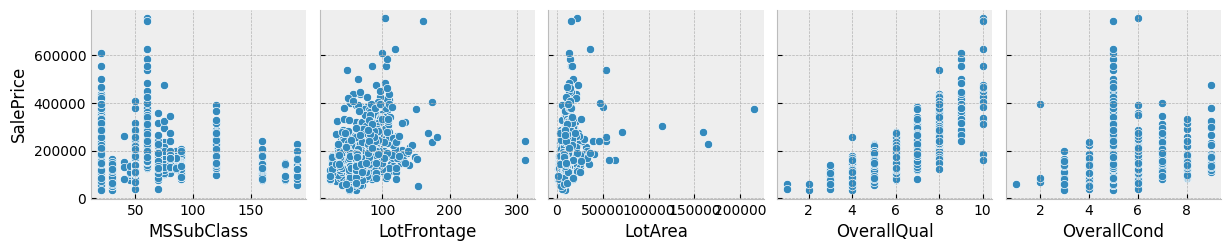

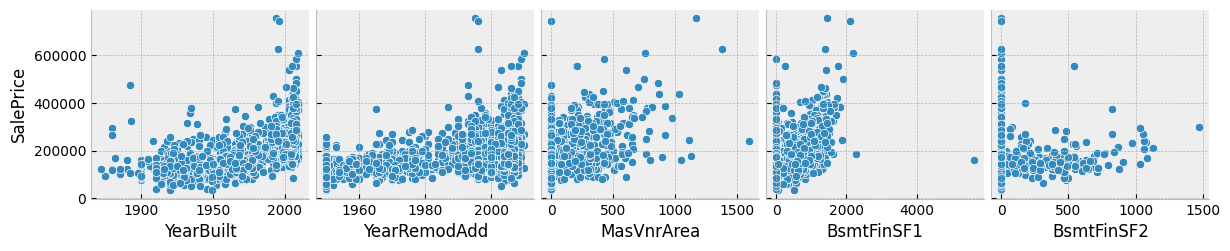

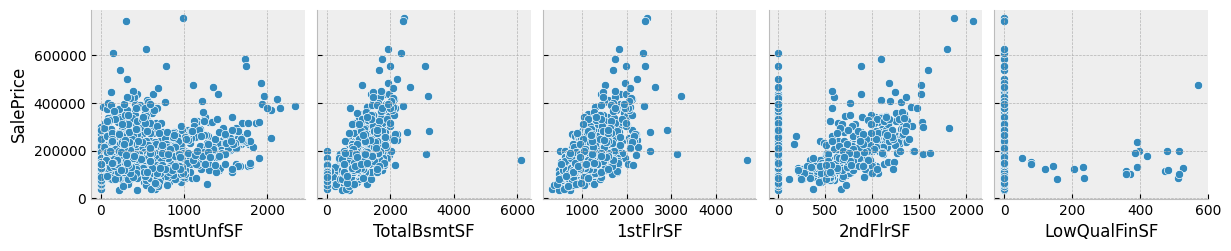

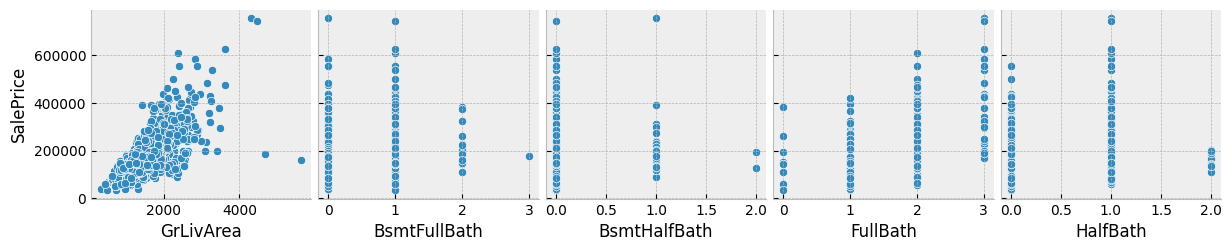

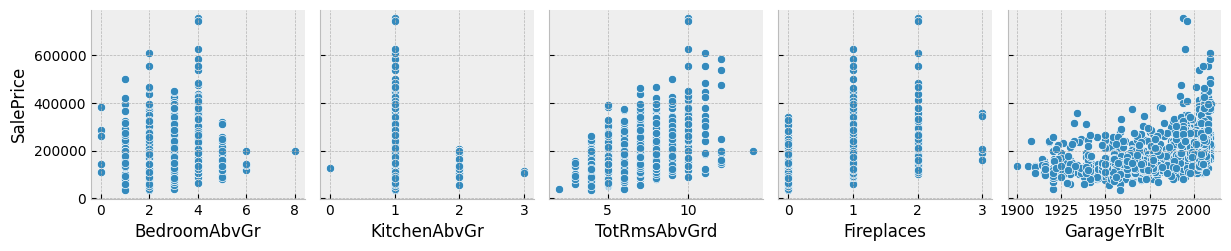

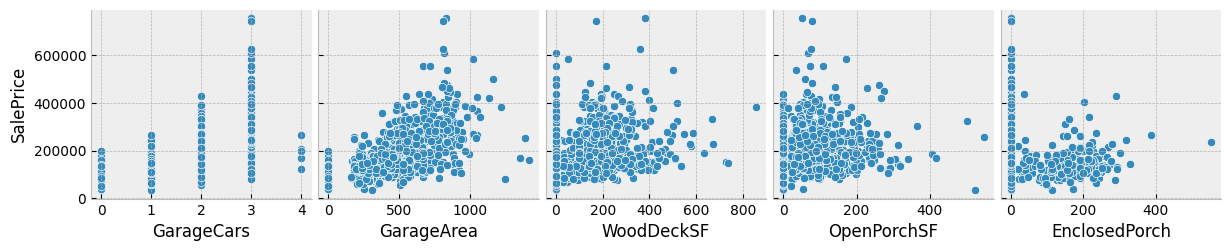

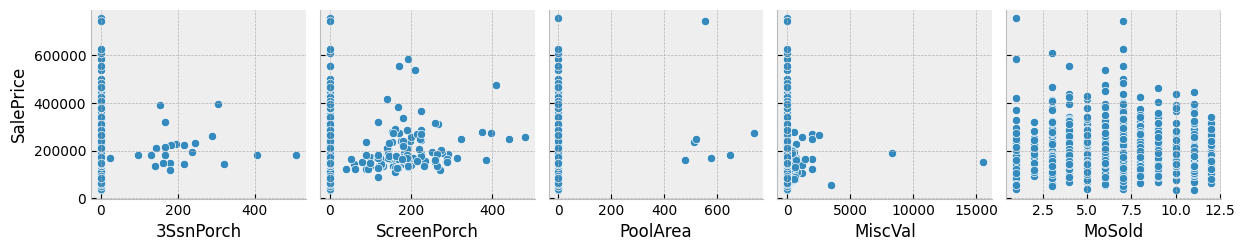

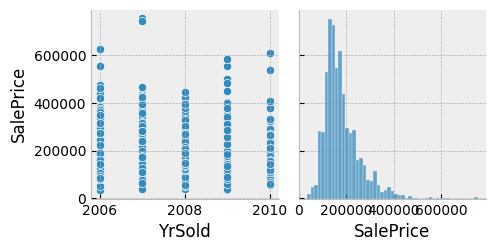

In [50]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

<font color='grey'>Nous pouvons clairement identifier certaines relations. La plupart d'entre eux semblent avoir une relation linéaire avec le ``SalePrice`` et si nous examinons attentivement les données, nous pouvons voir que de nombreux points de données sont situés sur`` x = 0``, ce qui peut indiquer l'absence d'une telle caractéristique dans la maison.

Prenez ``OpenPorchSF``, je doute que toutes les maisons aient un porche (la mienne n'en a pas par exemple mais je ne perds pas espoir qu'un jour... ouais un jour...).

Alors maintenant, supprimons ces valeurs ``0`` et répétons le processus de recherche de valeurs corrélées :</font>

In [51]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

<font color=grey>Très intéressant ! Nous avons trouvé une autre valeur fortement corrélée en nettoyant un peu les données. Maintenant, notre var ``golden_features_list`` ressemble à ceci :</font>

In [52]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


<font color='grey'>Nous avons trouvé des prédicteurs fortement corrélés avec `SalePrice`. Plus tard, avec l'ingénierie des fonctionnalités, nous pouvons ajouter des valeurs factices où la valeur d'une fonctionnalité donnée> 0 serait 1 (présence d'une telle fonctionnalité) et 0 serait 0.
<br />Pour `2ndFlrSF` par exemple, nous pourrions créer une valeur fictive pour sa précense ou sa non-précense et finalement la résumer à `1stFlrSF`.</font>

### Conclusion

<font color='grey'>En examinant la corrélation entre les valeurs numériques, nous avons découvert 11 caractéristiques qui ont une forte relation avec le prix d'un logement. Outre la corrélation, nous n'avons trouvé aucun modèle notable sur les données qui ne sont pas corrélées.</font>

Remarques:

<font color='grey'>- Il peut y avoir des modèles que je n'ai pas pu identifier en raison de mon manque d'expertise
- Certaines valeurs telles que `GarageCars` -> `SalePrice` ou `Fireplaces` -> `SalePrice` montrent un modèle particulier avec des lignes verticales, ce qui signifie à peu près qu'il s'agit de variables discrètes avec une courte plage, mais je ne sais pas si elles en ont besoin sorte de "`traitement spécial`".</font>

## Relation fonctionnalité à fonctionnalité

<font color='grey'>Essayer de tracer toutes les caractéristiques numériques dans un graphique de paires maritimes nous prendra trop de temps et sera difficile à interpréter. On peut essayer de voir si certaines variables sont liées entre elles et ensuite expliquer leur relation avec le bon sens.</font>

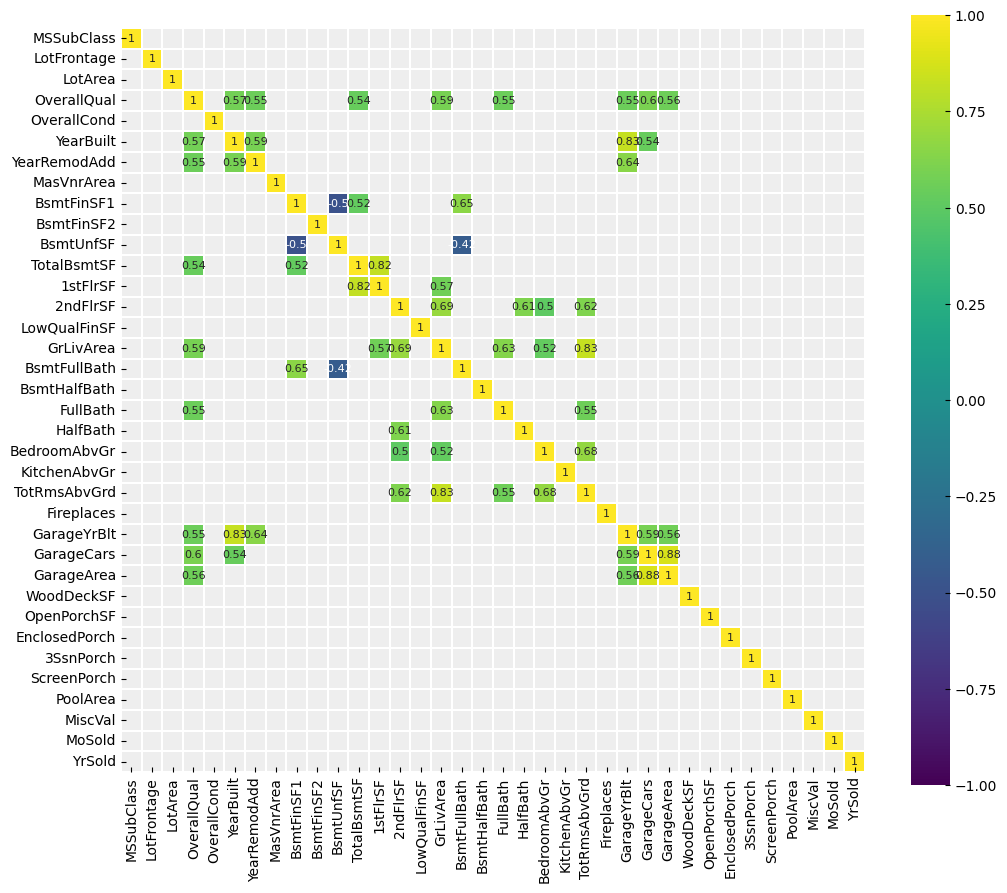

In [53]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<font color='grey'>De nombreuses fonctionnalités semblent être corrélées entre elles, mais certaines d'entre elles telles que `YearBuild`/`GarageYrBlt` peuvent simplement indiquer une inflation des prix au fil des ans. Quant à `1stFlrSF`/`TotalBsmtSF`, il est normal que plus le 1er étage est grand (considérant que de nombreuses maisons n'ont qu'un seul étage), plus le sous-sol total sera grand.

Maintenant, pour ceux qui sont moins évidents, nous pouvons voir que :
- Il existe une forte corrélation négative entre `BsmtUnfSF` (pieds carrés non finis de sous-sol) et `BsmtFinSF2` (pieds carrés finis de type 2). Il y a une définition des pieds carrés inachevés [ici](http://www.homeadvisor.com/r/calculating-square-footage/) mais comme pour une maison de "Type 2", je ne peux pas dire ce que c'est vraiment est.
- `HalfBath`/`2ndFlrSF` est intéressant et peut indiquer que les gens accordent de l'importance à ne pas avoir à se précipiter en bas en cas d'urgence pour aller aux toilettes (j'y penserai quand je m'achèterai une maison euh. ..)

Il y a bien sûr beaucoup plus à découvrir mais je ne peux pas vraiment expliquer le reste des fonctionnalités sauf les plus évidentes.</font>

<font color='grey'>Nous pouvons conclure que, par essence, certaines de ces fonctionnalités peuvent être combinées entre elles afin de réduire le nombre de fonctionnalités (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea` ) et d'autres indiquent que les gens s'attendent à ce que plusieurs fonctionnalités soient regroupées.</font>

## Q -> Q (relation quantitative à quantitative)

<font color='grey'>Examinons maintenant les caractéristiques quantitatives de notre base de données et leur relation avec le `SalePrice` qui est également quantitatif (d'où la relation Q -> Q). Je vais mener cette analyse avec l'aide du [Q -> Q chapter of the Standford MOOC](https://lagunita.stanford.edu/courses/OLI/StatReasoning/Open/courseware/eda_er/_m5_case_III/)</font>

<font color='grey'>Certaines des caractéristiques de notre ensemble de données sont catégorielles. Pour séparer les caractéristiques catégorielles des caractéristiques quantitatives, référons-nous au fichier `data_description.txt`. Selon ce fichier, nous nous retrouvons avec les colonnes suivantes :</font>

In [54]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


<font color='grey'>Pourtant, nous avons beaucoup de fonctionnalités à analyser ici, alors prenons les fonctionnalités * ``quantitativement fortement corrélées`` * de cet ensemble de données et analysons-les une par une</font>

In [55]:

features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse



['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Regardons leur distribution.

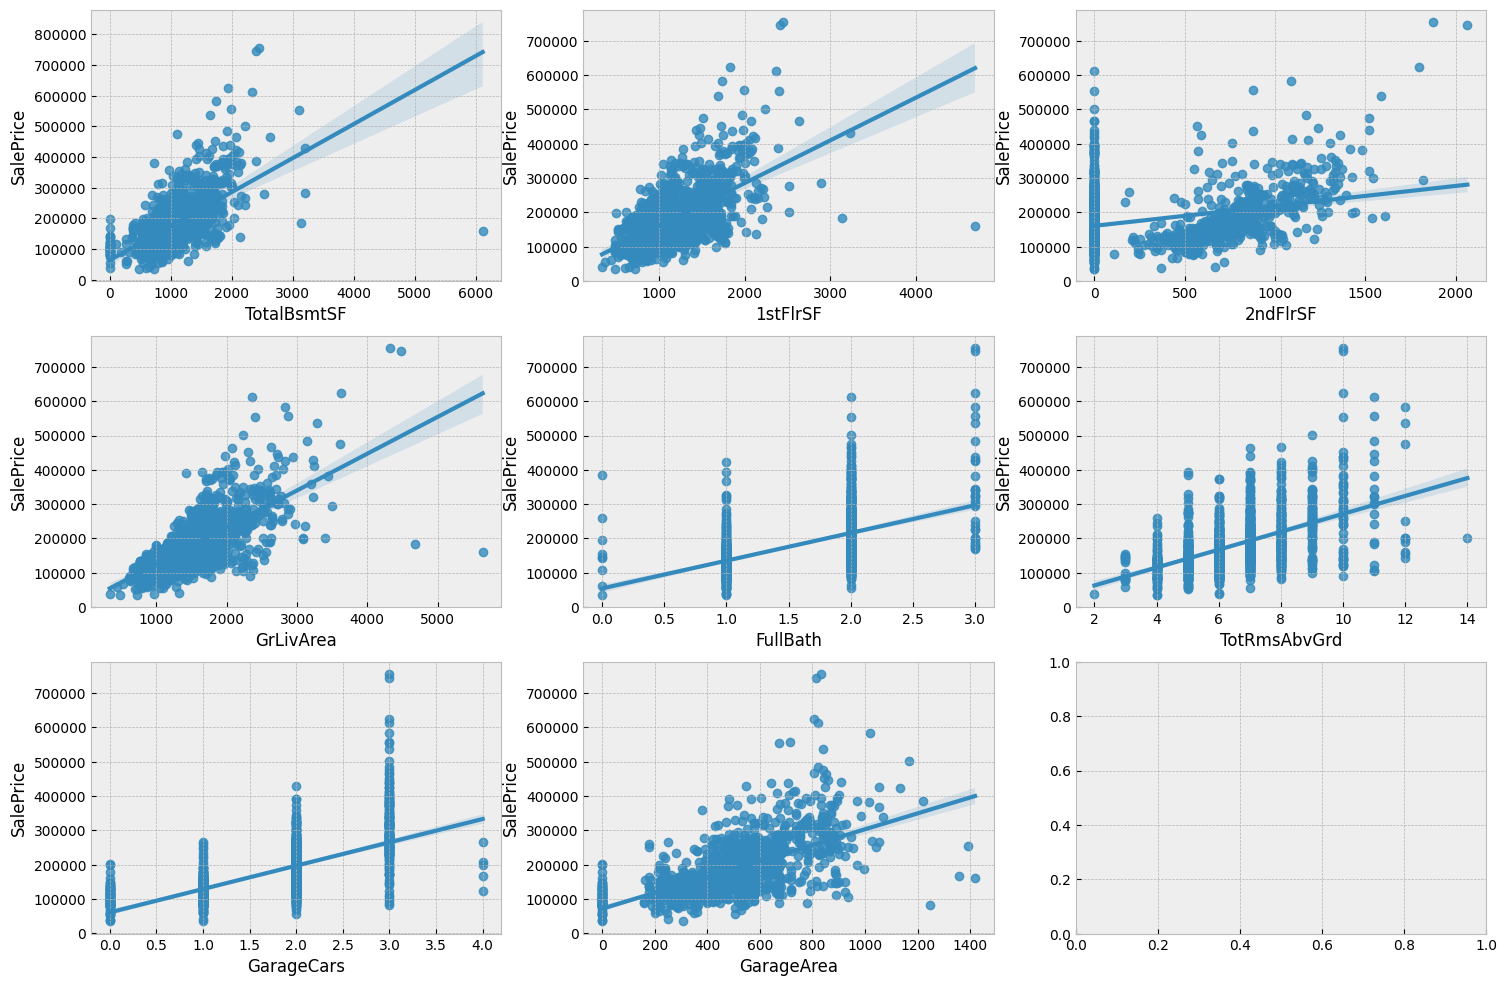

In [56]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

<font color='grey'>Nous pouvons voir que des fonctionnalités telles que `TotalBsmtSF`, `1stFlrSF`, `GrLivArea` ont une grande diffusion mais je ne peux pas dire quelles informations ces informations nous donnent. </font>

## C -> Q (relation catégorielle à quantitative)

<font color='grey'>Nous baserons cette partie de l'exploration sur le  [C -> Q chapter of the Standford MOOC](https://lagunita.stanford.edu/courses/OLI/StatReasoning/Open/courseware/eda_er/_m3_case_I/)

Obtenons toutes les caractéristiques catégorielles de notre ensemble de données et voyons si nous pouvons y trouver un aperçu.
Au lieu d'ouvrir à nouveau notre fichier `data_description.txt` et de vérifier quelles données sont catégorielles, supprimons simplement `quantitative_features_list` de l'ensemble de notre dataframe.</font>

In [57]:
# quantitative_features_list[:-1] car la dernière colonne est SalePrice et nous voulons la conserver.
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


<font color='grey'>Et n'oubliez pas les caractéristiques non numériques</font>

In [58]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


<font color='grey'>En regardant ces caractéristiques, nous pouvons voir que beaucoup d'entre elles sont du type `Object(O)`. Dans notre cahier de transformation de données, nous pourrions utiliser [Fonctions catégorielles Pandas](http://pandas.pydata.org/pandas-docs/stable/categorical.html) (équivalent au facteur R) pour façonner nos données d'une manière qui serait interprétable pour notre algorithme d'apprentissage automatique. `ExterQual` pour instace pourrait être transformé en un objet catégoriel ordonné.</font>

Maintenant, traçons certains d'entre eux

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

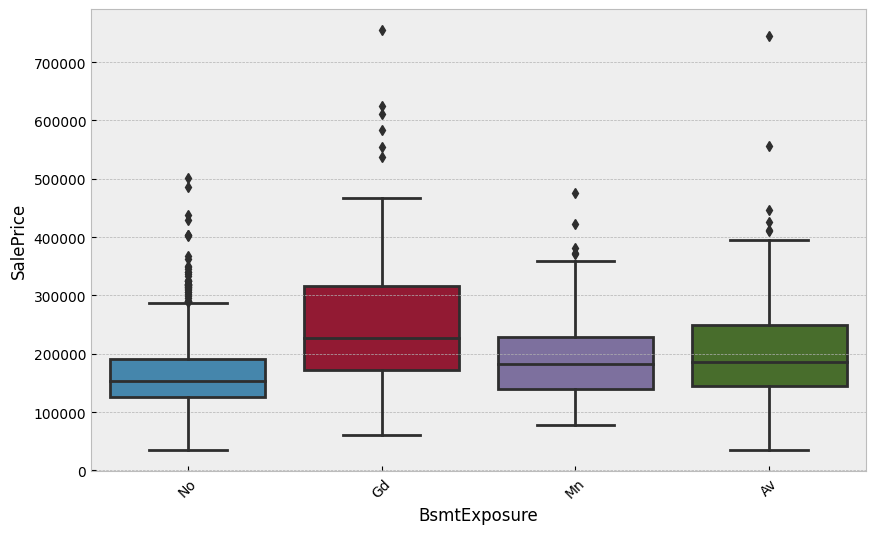

In [59]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

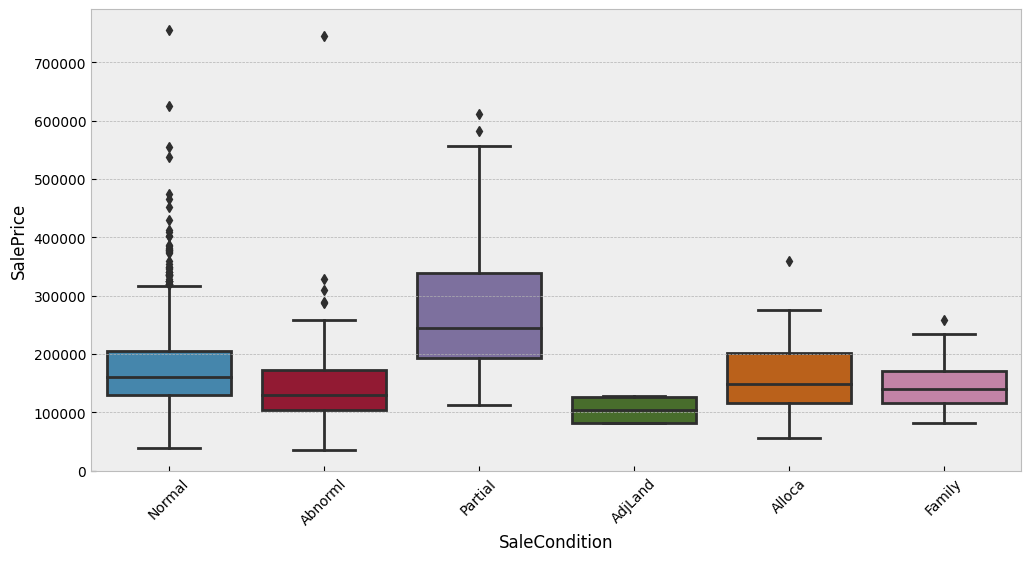

In [60]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Et enfin regardons leur distribution

/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_2080/650302845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

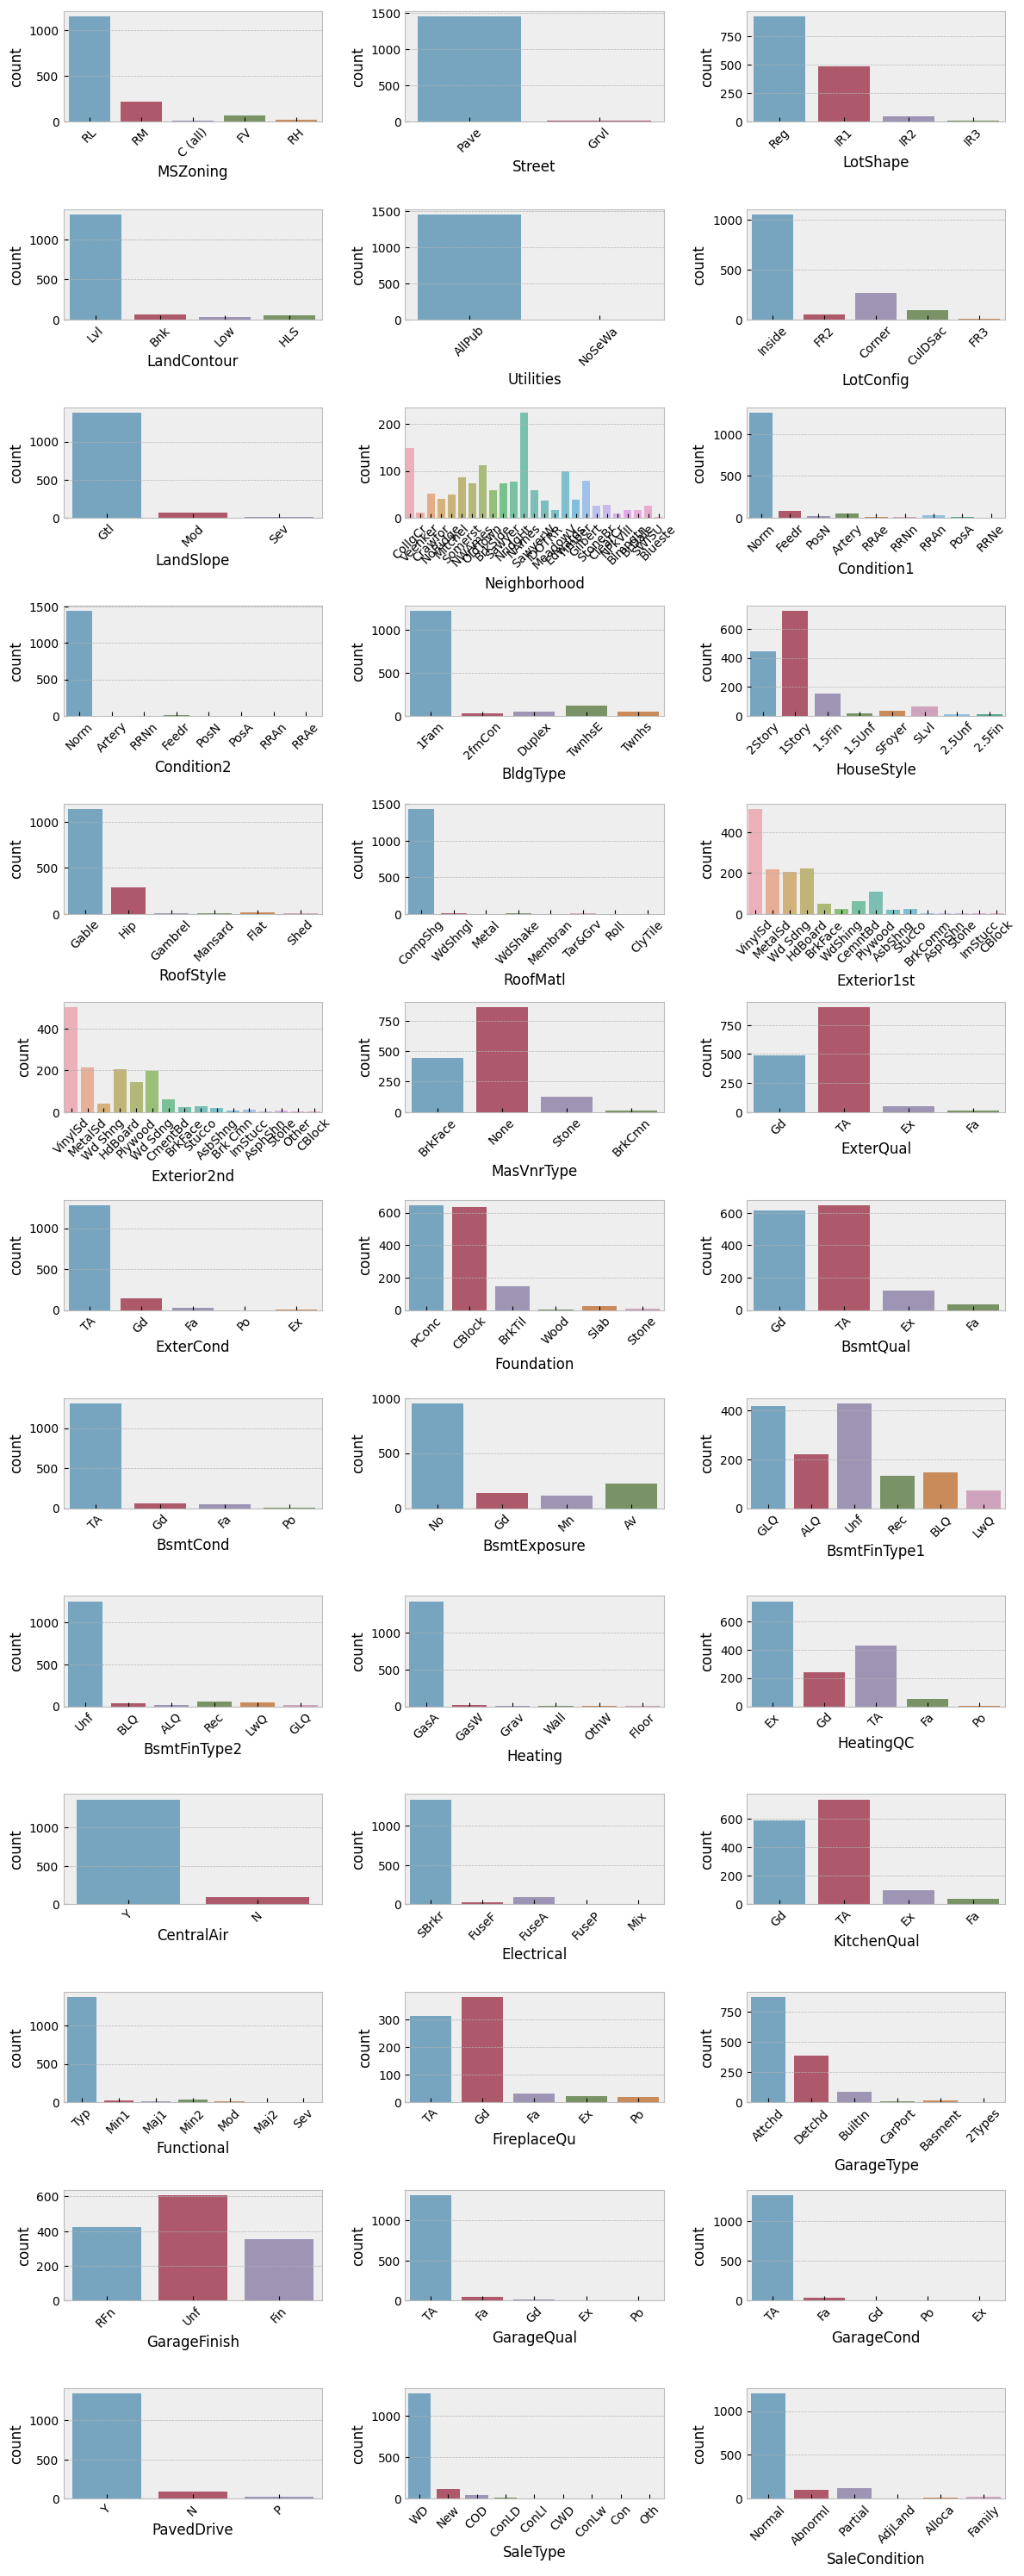

In [61]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

<font color='grey'>Nous pouvons voir que certaines catégories sont prédominantes pour certaines fonctionnalités telles que `Utilities`, `Heating`, `GarageCond`, `Functional`... Ces fonctionnalités peuvent ne pas être pertinentes pour notre modèle prédictif. </police>